In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
from highlight_text import fig_text

In [84]:
df = pd.read_csv("data.csv")
df = df.loc[(df["Pos"]=="MF") & (df["90s"]>=15)]
df = df.drop(["Rk", "Nation", "Pos", "Squad", "Age", "Born", "90s", "Cmp% - short", "Cmp% - long", 
              "Cmp% - medium", "Att - short", "Att - medium", "Att - long"],axis=1).reset_index()

In [87]:
params = list(df.columns)
params = params[2:]

In [106]:
df.Player

0          Brenden Aaronson
1               Tyler Adams
2         Rodrigo Bentancur
3            Moisés Caicedo
4                  Casemiro
5                Lewis Cook
6           Kevin De Bruyne
7     Kiernan Dewsbury-Hall
8           Cheick Doucouré
9         Christian Eriksen
10                  Fabinho
11             Remo Freuler
12       Idrissa Gana Gueye
13          Bruno Guimarães
14           İlkay Gündoğan
15         Jordan Henderson
16          Pierre Højbjerg
17               Alex Iwobi
18           Mathias Jensen
19          Boubacar Kamara
20            Mateo Kovačić
21              Roméo Lavia
22          Jefferson Lerma
23           Sean Longstaff
24             Douglas Luiz
25      Alexis Mac Allister
26            João Moutinho
27              Rúben Neves
28            Matheus Nunes
29       Christian Nørgaard
30             Amadou Onana
31            João Palhinha
32            Lucas Paquetá
33            Thomas Partey
34          Andreas Pereira
35            Harris

In [107]:
playerName = "Alex Iwobi"
playerName2 = "Rúben Neves"

bgColor = "lightgrey"
playerColor = "#0052CC"
player2Color = "#FDB913"

In [97]:
player = df.loc[df["Player"]== playerName].reset_index()
player = list(player.loc[0])
player = player[3:]

player_2 = df.loc[df["Player"]== playerName2].reset_index()
player_2 = list(player_2.loc[0])
player_2 = player_2[3:]

In [102]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
    
values_2 = []
for x in range(len(params)):
    values_2.append(math.floor(stats.percentileofscore(df[params[x]],player_2[x])))

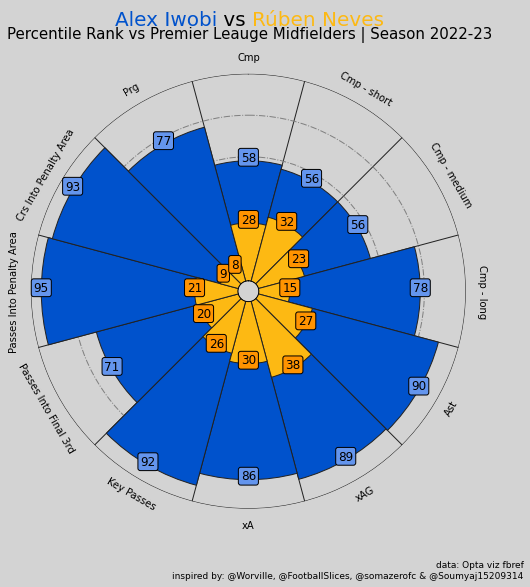

In [116]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color=bgColor,     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor=playerColor, edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor=player2Color, edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=10,
         va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,  zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, f"<{playerName}> vs <{playerName2}>", size=20, fig=fig,
    highlight_textprops=[{"color": playerColor}, {"color": player2Color}],
    ha="center", color="#000000"
)


# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Premier Leauge Midfielders | Season 2022-23",
    size=15,
    ha="center",  color="#000000"
)

# add credits
CREDIT_1 = "data: Opta viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
     color="#000000",
    ha="right"
)

plt.show()